# Weather Conditions in World War Two (Regression Prediction)

Hi! Mario here! In this project I'll use a dataset from Kaggle (https://www.kaggle.com/datasets/smid80/weatherww2/data), which contains information on weather conditions recorded on each day at various weather stations around the world, for the 1940-1945 period. This information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions. The idea is to predict the maximum temperature for each day, for which I'll use regression models.

The data set consists of 2 CSV files, one containing the weather summary, and the other containing the weather station locations. Let's first import some packages and load the datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV, cross_val_score

import warnings

warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('Summary of Weather.csv')
df2 = pd.read_csv('Weather Station Locations.csv')

In [3]:
print(F'Df1 has a {df1.shape} shape')
df1.head()

Df1 has a (119040, 31) shape


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(F'Df2 has a {df2.shape} shape')
df2.head()

Df2 has a (161, 8) shape


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


Let's see some information about the data frames, using the info() command, and the columns of the weather summary data frame.

In [5]:
df1.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


From the information above, we can see that in Df1 there are several columns containing only null values or close to null (for example, 532 or 5,563 non-null values from a total of 119,040). Let's remove those.

In [8]:
df1 = df1.dropna(axis = 1, how = 'all')
df1 = df1.drop(['WindGustSpd', 'DR', 'SPD', 'SND', 'PGT', 'TSHDSBRSGF', 'PoorWeather'], axis = 1)

The last 5 columns show technically the same as columns 3 to 7, so let's drop them too. Also, it doesn't make any sense to know the mean temperature, because we don't know the maximum temperature at that moment (it would be like looking into the future), so let's drop it along with date (we can use month).

In [9]:
df1 = df1.drop(['PRCP', 'MAX', 'MIN', 'MEA', 'SNF', 'MeanTemp', 'Date'], axis = 1)

Now let's create a data frame that merges this information with the numerical geographical location of the stations, and drop the stations' names, as they won't be necessary.

In [10]:
df = pd.merge(left = df1, right = df2[['WBAN', 'Latitude', 'Longitude']], how = 'left',  left_on = 'STA', 
              right_on = 'WBAN')
df = df.drop(['WBAN'], axis = 1)
df

,STA,Precip,MaxTemp,MinTemp,Snowfall,YR,MO,DA,Latitude,Longitude
0,10001,1.016,25.555556,22.222222,0.0,42,7,1,5.600000,-0.300000
1,10001,0,28.888889,21.666667,0.0,42,7,2,5.600000,-0.300000
2,10001,2.54,26.111111,22.222222,0.0,42,7,3,5.600000,-0.300000
3,10001,2.54,26.666667,22.222222,0.0,42,7,4,5.600000,-0.300000
4,10001,0,26.666667,21.666667,0.0,42,7,5,5.600000,-0.300000
...,...,...,...,...,...,...,...,...,...,...
119035,82506,0,28.333333,18.333333,0.0,45,12,27,-27.433333,153.133333
119036,82506,9.906,29.444444,18.333333,0.0,45,12,28,-27.433333,153.133333
119037,82506,0,28.333333,18.333333,0.0,45,12,29,-27.433333,153.133333
119038,82506,0,28.333333,18.333333,0.0,45,12,30,-27.433333,153.133333


Let's see if the resulting data frame has any null values.

In [11]:
df.isnull().sum()

STA             0
Precip          0
MaxTemp         0
MinTemp         0
Snowfall     1163
YR              0
MO              0
DA              0
Latitude        0
Longitude       0
dtype: int64

Let's fill those null values with 0, as they probably mean there wasn't any snow.

In [12]:
df = df.fillna(0)

Before, we could see that the Precipitation and Snowfall features have an 'Object' type, instead of a 'Float' type. Let's see why is that.

In [14]:
print(df['Precip'].unique())
print(df['Snowfall'].unique())

['1.016' '0' '2.54' 'T' '3.556' '0.508' '0.254' '1.778' '3.302' '0.762'
 '5.588' '5.08' '2.032' '25.654' '40.132' '19.05' '23.876' '4.064'
 '12.192' '2.794' '33.274' '19.304' '47.752' '6.35' '3.048' '8.382'
 '10.16' '27.178' '30.48' '45.212' '10.668' '15.494' '57.658' '58.166'
 '11.43' '31.242' '17.78' '26.924' '26.67' '6.604' '5.334' '4.826' '7.62'
 '8.636' '7.874' '12.446' '90.932' '13.462' '11.938' '5.842' '4.318'
 '6.096' '9.144' '4.572' '9.906' '9.652' '1.524' '13.97' '17.272' '33.528'
 '1.27' '13.716' '8.128' '22.352' '39.116' '36.068' '98.044' '3.81'
 '14.986' '78.232' '146.304' '14.732' '21.844' '120.904' '42.164' '23.368'
 '21.082' '44.958' '2.286' '50.038' '17.526' '51.054' '7.112' '25.4'
 '7.366' '16.256' '46.736' '8.89' '24.638' '11.684' '17.018' '144.78'
 '18.034' '50.8' '106.426' '36.576' '53.34' '34.798' '12.954' '26.416'
 '85.598' '47.498' '12.7' '11.176' '59.182' '33.782' '40.894' '28.194'
 '24.892' '14.478' '71.628' '102.108' '31.496' '36.322' '37.846' '35.56'
 '31.75

The values are registered as strings! Also, note that in the precipitations column, there are some values with a letter 'T'. Let's replace them with 0. Also, in snowfall there is a string called '#VALUE!'. Let's replace it with 0 too.

In [57]:
df['Precip'] = df['Precip'].replace('T', 0)
df['Snowfall'] = df['Snowfall'].replace('#VALUE!', 0)

We also have to convert the precipitation and snowfall columns to float values.

In [58]:
df['Precip'] = df['Precip'].astype(float)
df['Snowfall'] = df['Snowfall'].astype(float)

Let's plot the relationship between variables.

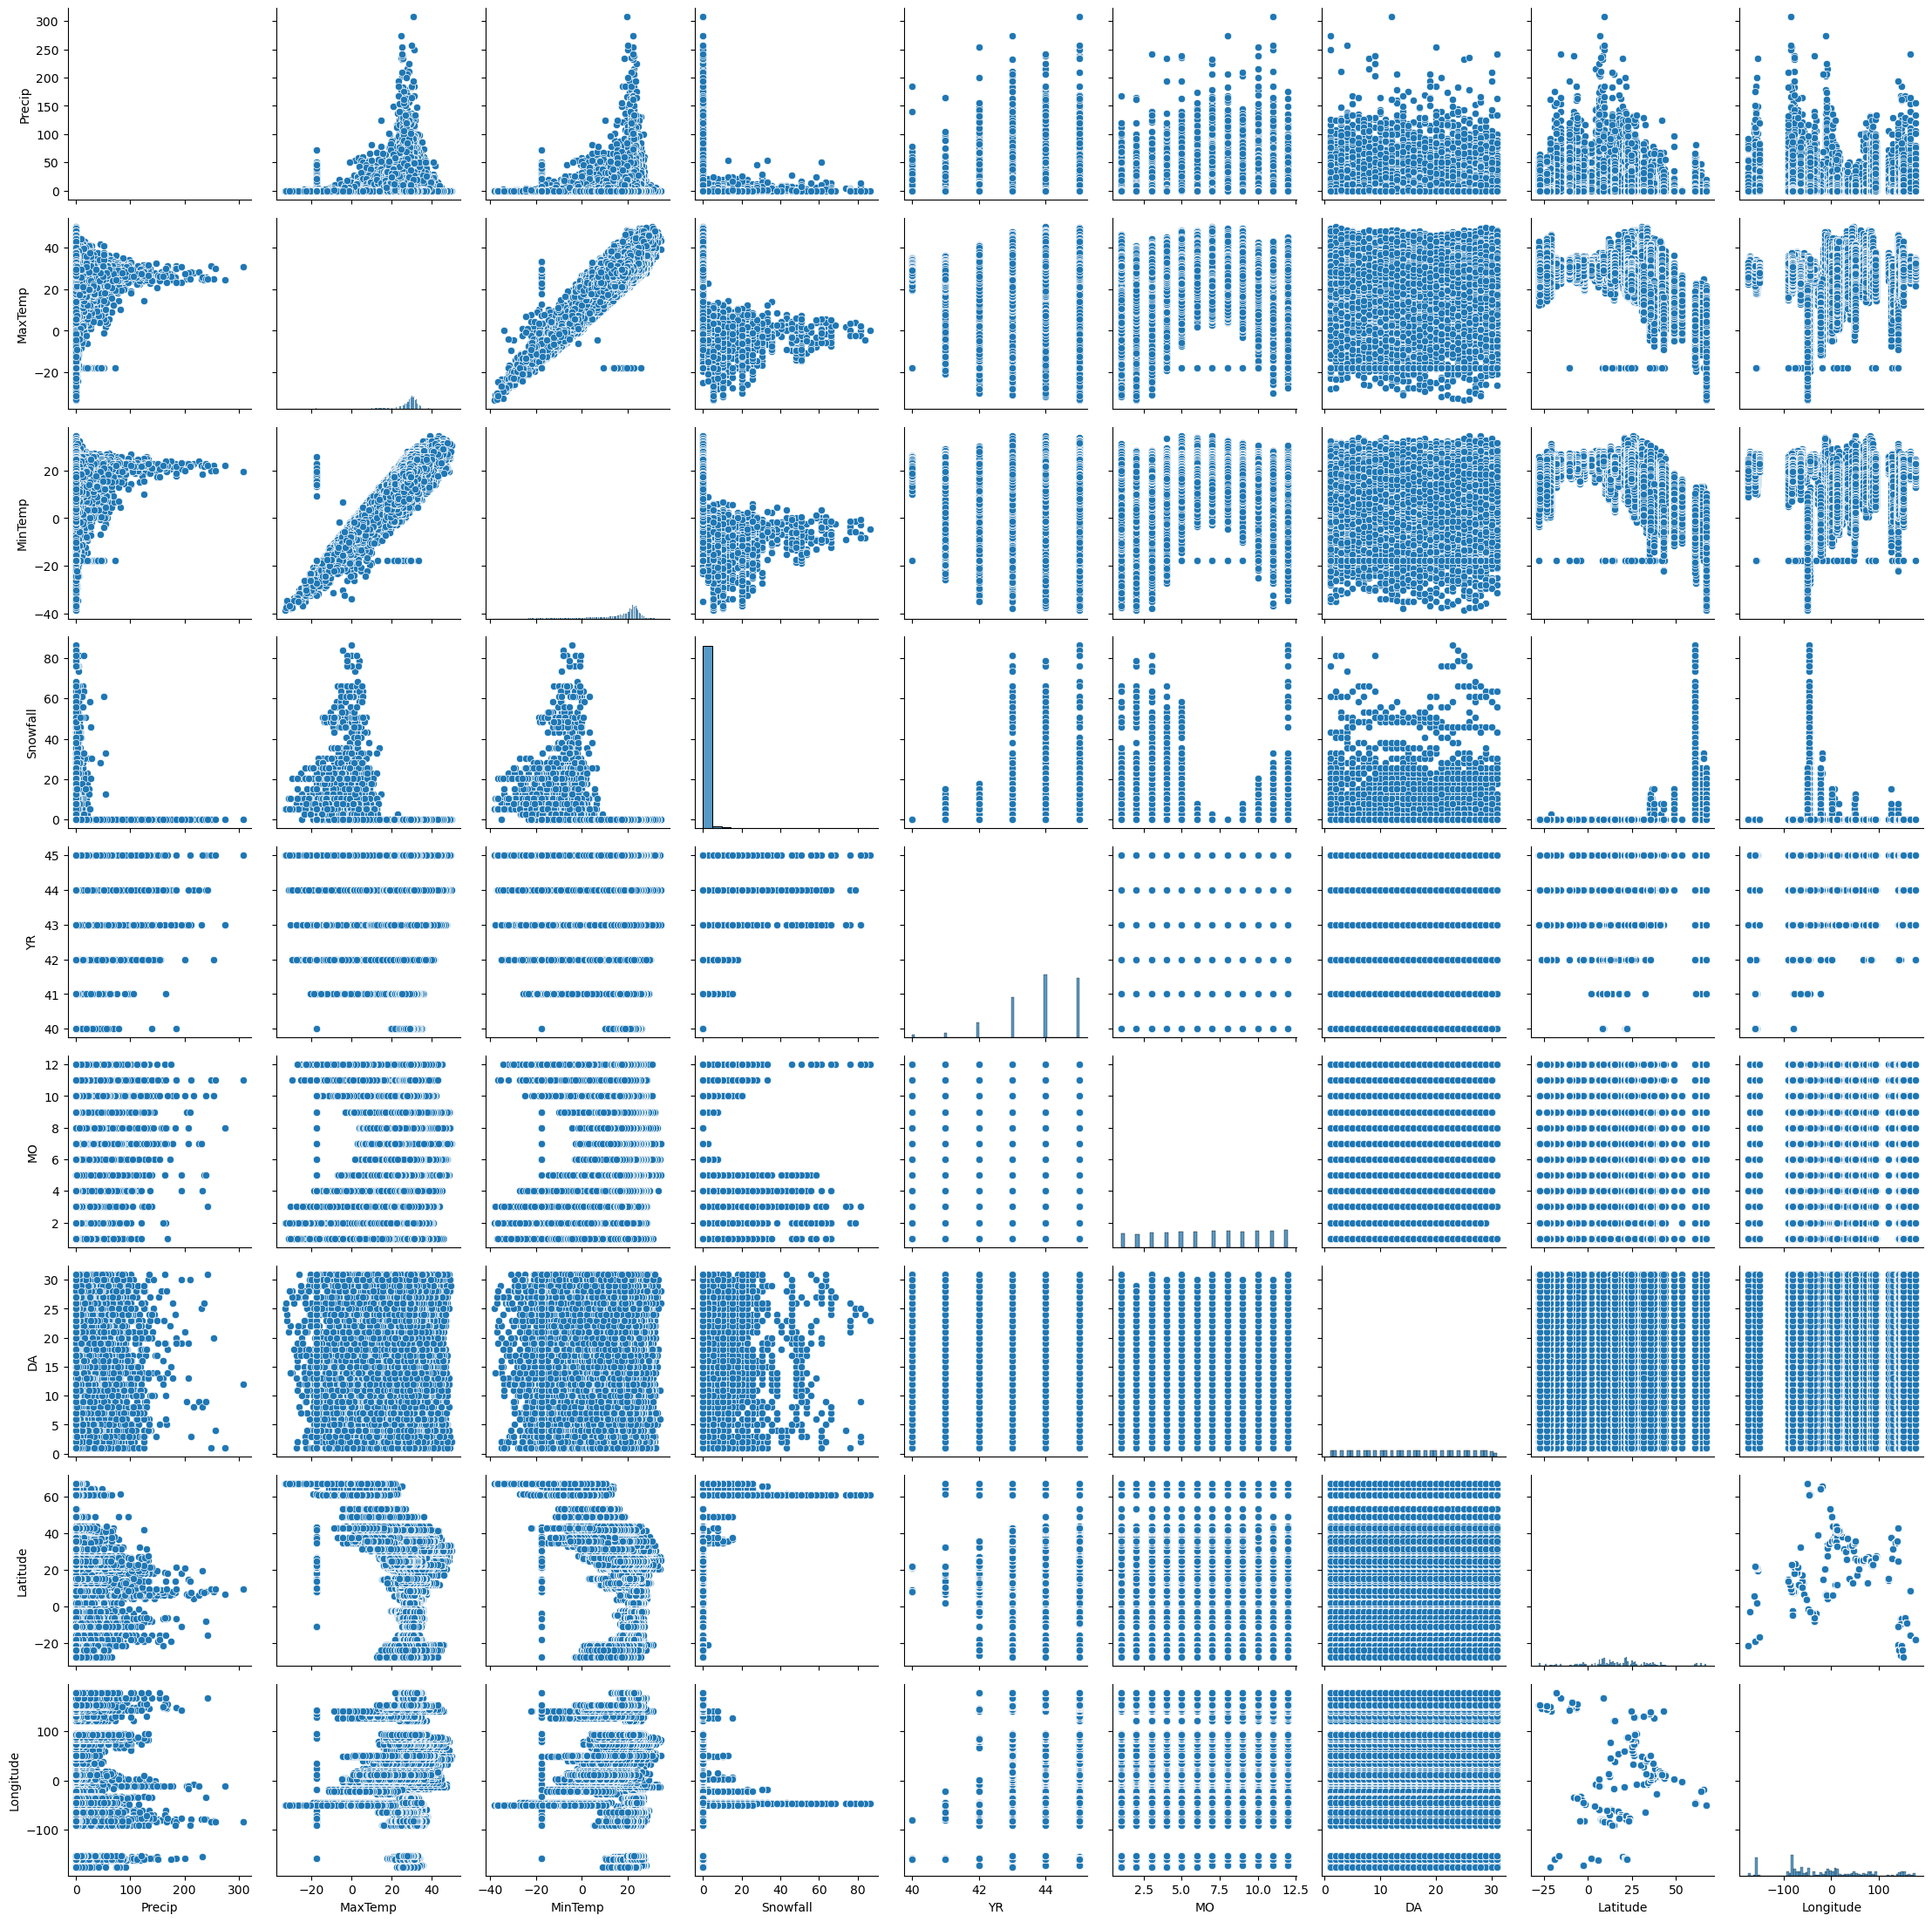

In [57]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

We can see that the most clear relationship is between the maximum and minimum temperature, which is linear. After that we have the month of the year, which could have something like a cuadratic function, where the highest temperatures are reached during summer in the northern hemisphere. Also, a higher latitude correlates with lower temperatures, whereas there is no clear graphic correlation to the longitude. We also see that precipitations tend to happen at higher temperatures and snowfall and lower ones, but the correlation isn't that clear. Let's look at the correlation matrix.

<Axes: >

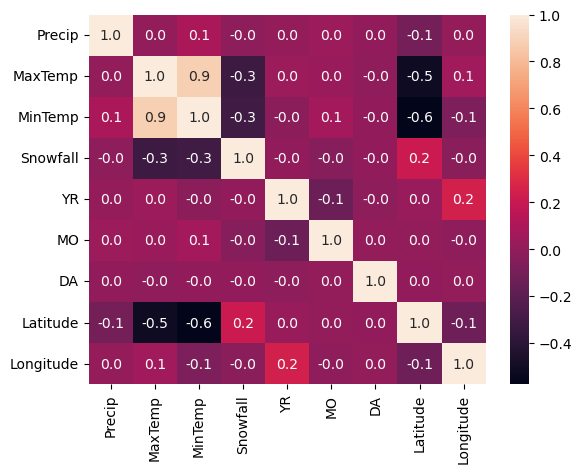

In [58]:
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

We can see that the correlation between the maximum and minimum temperature is really high, 0.9!! Then the latitude follows with -0.5 and then the snowfall, with -0.3. I'll use these 3 features to predict the maximum temperature using 3 models, a Ridge Regression,a Random Forest Regression and a MLP Classifier. I'll use 1 feature, 2 features and 3 features, always including the minimum temperature, as it seems to be the best predictor. The evaluation metric will be the Mean Absolute Error (MAE).

In [15]:
X1 = df['MinTemp'].to_numpy().reshape(-1,1)
X2 = df[['MinTemp', 'Latitude']]
X3 = df[['MinTemp','Snowfall']]
X4 = df[['MinTemp', 'Latitude', 'Snowfall']]
y = df['MaxTemp']

In [22]:
y.describe()

count    119040.000000
mean         27.045111
std           8.717817
min         -33.333333
25%          25.555556
50%          29.444444
75%          31.666667
max          50.000000
Name: MaxTemp, dtype: float64

In [16]:
def gridsearch(model, params, X, y):
    
    
    clf = GridSearchCV(model, params, scoring = {'MAE': 'neg_mean_absolute_error', 'R2': 'r2'}, 
                                                 refit = 'MAE', cv = 3, return_train_score = True)
    
    clf.fit(X, y)

    best_est = clf.best_estimator_

    results = clf.cv_results_
    
    print('best params: ', clf.best_params_)  
    
    
    index = np.where(results['rank_test_MAE'] == 1)[0]
    
    train_MAE = results['mean_train_MAE'][index]

    test_MAE = results['mean_test_MAE'][index]
    
    train_R2 = results['mean_train_R2'][index]

    test_R2 = results['mean_test_R2'][index]

    
    return best_est, pd.DataFrame({'Train MAE': train_MAE, 'Test MAE': test_MAE,
                    'Train R2': train_R2, 'Test R2': test_R2})
    
    

In [64]:
params = {'alpha': [ 0, 0.01, 0.1, 1, 10]}
ridge = Ridge(random_state = 0)

print('Metrics for only MinTemp: \n')
search = gridsearch(ridge, params, X1, y)
print(search[1])
print(F'Coefficient: {search[0].coef_}')
print('')
for X in [X2, X3, X4]:
    search = gridsearch(ridge, params, X, y)
    print(F'Metrics for {X.columns}: \n', search[1])
    print(F'Coefficient: {search[0].coef_}')
    print('')

Metrics for only MinTemp: 

best params:  {'alpha': 10}
   Train MAE  Test MAE  Train R2   Test R2
0  -3.154031 -3.283311  0.759046  0.701891
Coefficient: [0.91877312]

best params:  {'alpha': 0}
Metrics for Index(['MinTemp', 'Latitude'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -3.136805  -3.38586   0.76101  0.689883
Coefficient: [ 0.90599039 -0.00935874]

best params:  {'alpha': 10}
Metrics for Index(['MinTemp', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -3.132928 -3.244477  0.760911  0.702992
Coefficient: [ 0.90041817 -0.1901483 ]

best params:  {'alpha': 10}
Metrics for Index(['MinTemp', 'Latitude', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2  Test R2
0  -3.116785 -3.339434  0.762784  0.69189
Coefficient: [ 0.88947392 -0.0081666  -0.18796099]



In [49]:
params = {'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 100, 500, 1000, 2000], 'min_samples_split':
         [2, 100, 500, 1000, 2000, 4000]}

rf = RandomForestRegressor(random_state = 0)

print('Metrics for only MinTemp: \n')
search = gridsearch(rf, params, X1, y)
print(search[1])
print('')
for X in [X2, X3, X4]:
    search = gridsearch(rf, params, X, y)
    print(F'Metrics for {X.columns}: \n', search[1])
    print('')

Metrics for only MinTemp: 

best params:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 500}
   Train MAE  Test MAE  Train R2   Test R2
0  -2.799221 -3.013562  0.795652  0.743545

best params:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Metrics for Index(['MinTemp', 'Latitude'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -2.454234 -3.103977   0.83848  0.735381

best params:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Metrics for Index(['MinTemp', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -2.771948 -2.997933  0.799316  0.740523

best params:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Metrics for Index(['MinTemp', 'Latitude', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -2.454237 -3.103965   0.83848  0.735384



In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

params = {'mlp__alpha': [0.00001, 0.0001, 0.001, 0.1], 'mlp__hidden_layer_sizes': [(25, ), (50, ), (100, )],
         'mlp__early_stopping': [True, False]}

pipe = Pipeline([('scaler', MinMaxScaler()), ('mlp', MLPRegressor(random_state = 0))])

print('Metrics for only MinTemp: \n')
search = gridsearch(pipe, params, X1, y)
print(search[1])
print('')
for X in [X2, X3, X4]:
    search = gridsearch(pipe, params, X, y)
    print(F'Metrics for {X.columns}: \n', search[1])
    print('')

Metrics for only MinTemp: 

best params:  {'mlp__alpha': 0.1, 'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (100,)}
   Train MAE  Test MAE  Train R2   Test R2
0  -2.958517 -3.134645  0.782612  0.717925

best params:  {'mlp__alpha': 0.1, 'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (50,)}
Metrics for Index(['MinTemp', 'Latitude'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -2.633563 -3.482703  0.822855  0.540327

best params:  {'mlp__alpha': 0.001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (50,)}
Metrics for Index(['MinTemp', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0   -2.87635 -2.972027  0.789124  0.747034

best params:  {'mlp__alpha': 0.1, 'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (25,)}
Metrics for Index(['MinTemp', 'Latitude', 'Snowfall'], dtype='object'): 
    Train MAE  Test MAE  Train R2   Test R2
0  -2.753708 -3.133221  0.803923  0.688591



From the results, we can see that the best model is a MLP Classifier with alpha = 0.001, early stopping and 50 units per hidden layer, obtaining a Mean Absolute Error of 2.97 Celsius degrees and a $R^2$ close to 0.75, this using the Minimum Temperature and the Snowfall features. The MAE could be considered acceptable, given the fact that the Maximum Temperature ranges from -33°C to 50°C. However, it might not be optimal, as there is a 25% of the variance that isn't explained by the model. Another approach that I'll try in another Jupyter Notebook will be to use Time Series for each station, because this unexplained variance might come due to singularities of each one of them.